# 1.3 - Polynomial Regression

__Input__: Dataset $((x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N))$ with a single feature (aka predictor, or covariate) and a response variable

__Purpose__: Find the "best" polynomial function $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_m x^m$ that fits the data. 

__Approach__: Treat each nonlinear term in $f(x)$ as a new independent linear feature. Then, use multilinear regression.

__Assumptions__: That data follows the polynomial function $f(x)$ with degree $m$.

__Hyperparameters__: $m$, degree of the polynomial. Other assumptions from multilinear regression.



In the code below I implement this creation of matrix $X$ containing the new predictors $x^i$ along the columns, and then use the code from the past section for the multilinear regression. The example is a bit convoluted: I create the array $x$, then I create the matrix $X$ with the different degrees, multiply it with the pre-defined coefficients to obtain the values of y. I do this instead of simply generating $y$ explicly as in the definition of $f(x)$ because with this I can generate the matrix $X$ with the converted matrix $X_pred$ in the code to ensure that the code is working correctly.

Anyway, I generate a simple polynomial curve with some noise and then run the code on it. A small to-do would be to implement the sci-kit version and compare.

In [42]:
import numpy as np

def pad_matrix_with_ones(M):
    """receive a (n, P) matrix M, pad it on the left with ones to return a (n, P+1) matrix to be used in MLR"""
    # Get the number of rows in the matrix
    n = M.shape[0]
    
    # Create a column vector of ones with the same number of rows as the input matrix
    ones_column = np.ones((n, 1))
    
    # Concatenate the column vector of ones with the input matrix horizontally
    padded_M = np.hstack((ones_column, M))
    
    return padded_M

def polynomial_predictors(x, degree):
    """create matrix X with j-th column containing x^j, already padded with ones on the left"""
    X = np.ones((len(x), degree+1))
    for i in range(1, degree+1):
        X[:, i] = x_vals ** i
    return X

def estimate_coefficients_polynomial(x, y, degree):
    X = polynomial_predictors(x, degree)
    coeffs = estimate_coefficients_multilinear(X, y)
    return coeffs, X

def estimate_coefficients_multilinear(X, Y):
    """ 
    X: feature matrix, padded with ones on the left
    Y: response vector
    """
    XT = np.transpose(X)
    coeffs = np.linalg.inv(XT @ X) @ XT @ Y
    return coeffs

def linear_regression_estimate(X, beta):
    return X @ beta


In [38]:
def generate_polynomial_noisy_data(num_points, noise_strength, coefficients):
    """ given a vector of n amplitudes, generate a multilinear response y = intercept + coefficients """
    # Set random seed for reproducibility
    np.random.seed(1)
    
    # Generate random x values between 0 and 10
    num_feats = len(x_amp) 
    X = np.zeros((num_points, num_feats))
    x_vals = np.sort(np.random.uniform(-1, 1, num_points))
    for i in range(0, num_feats):
        degree = i+1
        X[:, i] = x_vals ** degree

    X_padded = pad_matrix_with_ones(X)
    
    # Generate y values using a linear relationship with noise
    y_true = X_padded @ coefficients

    # Generate random noise for y values
    noise = noise_strength * np.random.randn(num_points)
    
    y_noise = y_true + noise
    return x_vals, X, X_padded, y_true, y_noise

# Generate example
num_points = 50
noise_strength = 0.2
coefficients = (2, 3, 5, 3) #intercept and slopes
real_degree = len(coefficients)-1
x_vals, X, X_padded, y_true, y = generate_polynomial_noisy_data(num_points, noise_strength, coefficients)



Polynomial predictors is working: True


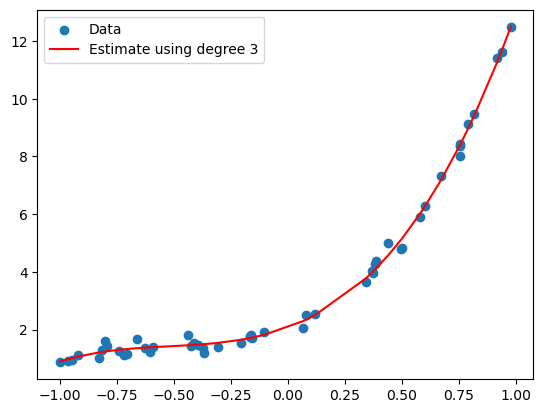

In [39]:
#inputs: x_vals, y
degree = real_degree
X_pred = polynomial_predictors(x_vals, degree)
print(f'Polynomial predictors is working: {np.allclose(X_padded, X_pred)}')

coeffs, X_pred = estimate_coefficients_polynomial(x_vals, y, degree)
y_pred = linear_regression_estimate(X_pred, coeffs)
import matplotlib.pyplot as plt
plt.scatter(x_vals, y, label = f'Data')
plt.plot(x_vals, y_pred, color='red', label=f'Estimate using degree {degree}')
plt.legend()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_poly_pred(x_train, x_test, y_train, degree=1):

    # Generate polynomial features on the train data
    x_poly_train= PolynomialFeatures(degree=degree).fit_transform(x_train)

    # Generate polynomial features on the test data
    print(x_train.shape, x_test.shape, y_train.shape)
    x_poly_test= PolynomialFeatures(degree=degree).fit_transform(x_test)

    # Initialize a model to perform polynomial regression
    polymodel = LinearRegression()

    # Fit the model on the polynomial transformed train data
    polymodel.fit(x_poly_train, y_train)

    # Predict on the entire polynomial transformed test data
    y_poly_pred = polymodel.predict(x_poly_test)
    return y_poly_pred